2025-1 생물정보학 및 실습 1 (001)

Your Own Analysis 3

2023-10131 임춘선

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

from collections import Counter

In [2]:
# Google Colab을 이용함

# Data 출처

# APEX-RIP
# Live-cell mapping of organelle-associated RNAs via proximity biotinylation combined with protein-RNA crosslinking (2017)
# https://doi.org/10.7554/eLife.29224
# apex_rip의 데이터는 HEK293T를 이용한 실험에서 얻어짐
# Supplementary file 3로부터 ER-associated RNA에 대한 데이터를 얻음

# GENCODE
# https://www.gencodegenes.org
# human protein coding RNA의 sequence를 얻음

# human RNA의 데이터를 이용하여 분석함

1. APEX-RIP 실험 데이터로부터 human mRNA의 ensembl ID와 ER-association 여부를 match 시킨 dictionary 생성

In [3]:
apex_rip = '/content/drive/MyDrive/bioinfo/APEX-RIP/Supplementary file 3.xlsx'

ER_associated_RNA = pd.read_excel(apex_rip, sheet_name='A-APEX-RIP ER associated RNAs') # ER-associated RNA
ER_associated_mRNA = ER_associated_RNA[ ER_associated_RNA['Gene type'] == 'protein_coding' ].reset_index(drop=True) # ER-associated mRNA

In [4]:
gene_name_cnt = Counter( ER_associated_mRNA['Gene name'] )

duplicate_gene = []

for gene_name in  gene_name_cnt :
    if gene_name_cnt[gene_name] > 1 :
        duplicate_gene.append(gene_name)

print(duplicate_gene)

# Gene name이 2번 이상 존재하는 경우를 발견
# ENSG가 중복되는 경우는 없었음

['F11R', 'SLC5A3', 'CRYBG3']


In [5]:
# Gene name이 중복되는 경우 ENSG의 comma 뒤의 version이 가장 높은 경우 하나만 남김

del_index_list = []

for gene_name in duplicate_gene :

    gene_df = ER_associated_mRNA[ ER_associated_mRNA['Gene name'] == gene_name ]

    ENSG_list = gene_df['Ensemble Gene ID']

    version_max = max( int(ENSG.split('.')[1]) for ENSG in ENSG_list )

    del_index = list(gene_df.index)

    for i in gene_df.index :
        if int(gene_df.loc[i]['Ensemble Gene ID'].split('.')[1]) == version_max :
            del_index.remove(i)
            break

    del_index_list.extend(del_index)

In [6]:
ER_associated_mRNA = ER_associated_mRNA.drop(del_index_list).reset_index(drop=True)

In [7]:
gene_name_cnt = Counter( ER_associated_mRNA['Gene name'] )

duplicate_gene = []

for gene_name in  gene_name_cnt :
    if gene_name_cnt[gene_name] > 1 :
        duplicate_gene.append(gene_name)

print(duplicate_gene)

# Gene name의 중복이 사라짐

[]


In [8]:
ER_associated_mRNA_ENSG = ER_associated_mRNA['Ensemble Gene ID'] # ER-associated mRNA의 Ensembl Gene ID (ENSG) , ENST에 대한 정보가 없어서 isoform은 무시함
ER_associated_mRNA_ENSG = set( ENSG.split('.')[0] for ENSG in ER_associated_mRNA_ENSG ) # comma 뒤의 ENSG version은 무시

In [9]:
APEX_RNA = pd.read_excel(apex_rip, sheet_name='B-Unfildered KDEL-RIP Seq Data') #APEX-RIP 실험에서 검출된 모든 RNA
APEX_mRNA = APEX_RNA[ APEX_RNA['Gene type'] == 'protein_coding' ].reset_index(drop=True) #APEX-RIP 실험에서 검출된 모든 mRNA

In [10]:
gene_name_cnt = Counter( APEX_mRNA['Gene name'] )

duplicate_gene = []

for gene_name in  gene_name_cnt :
    if gene_name_cnt[gene_name] > 1 :
        duplicate_gene.append(gene_name)

print(duplicate_gene)

# Gene name이 2번 이상 존재하는 경우를 발견
# ENSG가 중복되는 경우는 없었음

['SEPT1', 'F11R', 'ACE', 'TAP2', 'TM9SF1', 'AKAP17A', 'ALG9', 'ANKRD18A', 'SLC5A3', 'ASMT', 'ASMTL', 'CCDC177', 'CD99', 'CDRT1', 'CELF6', 'CFB', 'CHTF8', 'CKS1B', 'CLN3', 'CRIP1', 'CRLF2', 'CSF2RA', 'DCAF8', 'DEFB130', 'DHRSX', 'ITFG3', 'EFNA3', 'FAM47E', 'GALT', 'TMBIM4', 'GOLGA6L9', 'GOLGA7B', 'GTPBP6', 'CRYBG3', 'MDGA2', 'HOXC4', 'IDS', 'IER3IP1', 'IL3RA', 'IL9R', 'ITGB3', 'KBTBD4', 'KIAA0391', 'KLK9', 'KRBOX1', 'KRT222', 'LCN6', 'LIMS3L', 'LSP1', 'LTB4R2', 'MFRP', 'MRPL30', 'MRPS17', 'MUC3A', 'NAA60', 'NDUFA7', 'NDUFB8', 'ZNF668', 'P2RY8', 'PAGR1', 'PIK3R2', 'PLCXD1', 'POLR2J2', 'PPP2R3B', 'SLC25A10', 'PSMA2', 'RBL1', 'RNASE11', 'RPP14', 'SDHD', 'SHOX', 'SHPK', 'SIGLEC5', 'SLC25A6', 'SNURF', 'SOGA3', 'SOX7', 'SPRY3', 'TIMM10B', 'TLR9', 'TM4SF19', 'TMEM236', 'TMEM239', 'TMEM249', 'ZNF8', 'TUBB3', 'UGT2A1', 'UQCR11', 'VAMP7', 'ZBED1', 'ZFP41', 'ZMYM6', 'ZNF177', 'ZNF223', 'ZNF286A', 'ZNF709', 'ZNF763', 'ZNF788']


In [11]:
# Gene name이 중복되는 경우 ENSG의 comma 뒤의 version이 가장 높은 경우 하나만 남김

del_index_list = []

for gene_name in duplicate_gene :

    gene_df = APEX_mRNA[ APEX_mRNA['Gene name'] == gene_name ]

    ENSG_list = gene_df['Ensemble Gene ID']

    version_max = max( int(ENSG.split('.')[1]) for ENSG in ENSG_list )

    del_index = list(gene_df.index)

    for i in gene_df.index :
        if int(gene_df.loc[i]['Ensemble Gene ID'].split('.')[1]) == version_max :
            del_index.remove(i)
            break

    del_index_list.extend(del_index)

In [12]:
APEX_mRNA = APEX_mRNA.drop(del_index_list).reset_index(drop=True)

In [13]:
gene_name_cnt = Counter( APEX_mRNA['Gene name'] )

duplicate_gene = []

for gene_name in  gene_name_cnt :
    if gene_name_cnt[gene_name] > 1 :
        duplicate_gene.append(gene_name)

print(duplicate_gene)

# Gene name의 중복이 사라짐

[]


In [14]:
APEX_mRNA_ENSG = APEX_mRNA['Ensemble Gene ID'] # APEX-RIP으로부터 얻은 human mRNA의 Ensembl Gene ID (ENSG), ENST에 대한 정보가 없어서 isoform은 무시함
APEX_mRNA_ENSG = set( ENSG.split('.')[0] for ENSG in APEX_mRNA_ENSG ) # comma 뒤의 ENSG version은 무시

In [15]:
mRNA_ENSG_ER = dict.fromkeys(APEX_mRNA_ENSG, 0) # mRNA의 ENSG와 ER-associated 여부를 매칭한 dictionary, ER-associated=1, non-ER-associated=0

for ENSG in mRNA_ENSG_ER :
    if ENSG in ER_associated_mRNA_ENSG :
        mRNA_ENSG_ER[ENSG] = 1

In [16]:
pd.DataFrame( mRNA_ENSG_ER.items(), columns=['mRNA ENSG', 'ER-associated'] )

,mRNA ENSG,ER-associated
0,ENSG00000006747,0
1,ENSG00000131037,0
2,ENSG00000119927,1
3,ENSG00000216937,0
4,ENSG00000221989,0
...,...,...
20226,ENSG00000267260,0
20227,ENSG00000117305,0
20228,ENSG00000168702,1
20229,ENSG00000164744,0


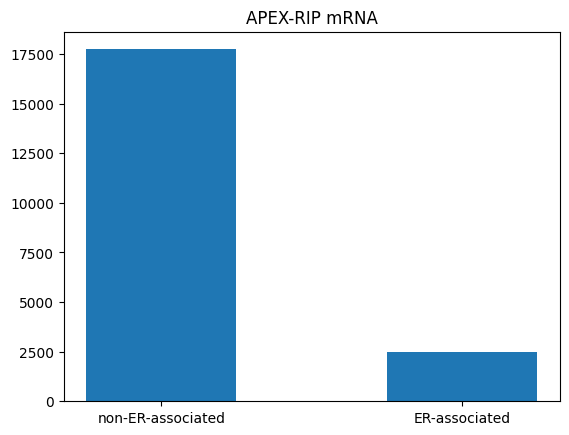

In [17]:
x = ['non-ER-associated', 'ER-associated']
y = Counter(mRNA_ENSG_ER.values()).values()

plt.bar(x, y, width=0.5)
plt.title('APEX-RIP mRNA')
plt.show()

2. GENCODE 데이터로부터 human mRNA의 ensembl ID와 isoform의 sequence를 match 시킨 dictionary 생성

In [18]:
# human protein-coding transcript sequence가 담긴 fasta file, 데이터 처리의 편의를 위해 마지막 줄에 >END|END.0 삽입

pc_transcripts = '/content/drive/MyDrive/bioinfo/GENCODE/gencode.v48.pc_transcripts.fa'

In [19]:
GENCODE_mRNA_ENSG = set() # GENCODE로부터 얻은 human mRNA의 ENSG

data = open(pc_transcripts)

for line in data :
    if line.startswith('>') :
        ENSG = line.split('|')[1].split('.')[0]
        GENCODE_mRNA_ENSG.add(ENSG)

GENCODE_mRNA_ENSG.remove('END')

data.close()

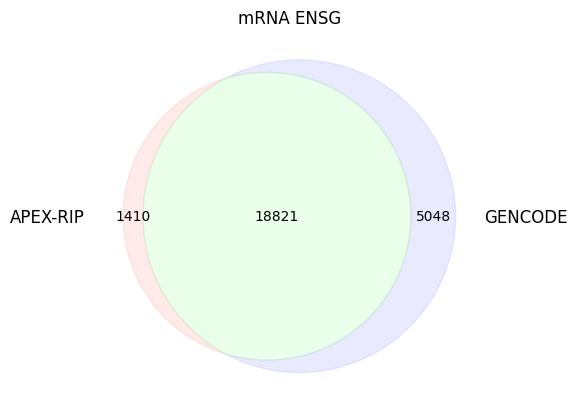

In [20]:
# APEX-RIP으로부터 얻은 ENSG와 GENCODE로부터 얻은 ENSG 비교

venn = venn2( [APEX_mRNA_ENSG, GENCODE_mRNA_ENSG], set_labels=['APEX-RIP', 'GENCODE'] )

venn.set_labels[0].set_position( [-0.7, 0.03] )
venn.set_labels[1].set_position( [0.7, 0.03] )

venn.get_patch_by_id('10').set_color('#ff9999')
venn.get_patch_by_id('01').set_color('#9999ff')
venn.get_patch_by_id('11').set_color('#99ff99')

venn.get_patch_by_id('10').set_alpha(0.2)
venn.get_patch_by_id('01').set_alpha(0.2)
venn.get_patch_by_id('11').set_alpha(0.2)

plt.title('mRNA ENSG')
plt.show()

# APEX-RIP의 데이터는 하나의 cell line인 HEK293T로부터 얻은 데이터이므로 GENCODE에서의 누락이 많음을 확인할 수 있음
# APEX-RIP에만 있고 GENCODE에 없는 ENSG는 https://asia.ensembl.org/ 에서 검색한 결과 현재는 유효하지 않은 경우가 많았음

In [21]:
mRNA_ENSG = APEX_mRNA_ENSG & GENCODE_mRNA_ENSG # APEX-RIP과 GENCODE에서 공통적으로 나타나는 ENSG, APEX-RIP에 치우친 데이터

In [22]:
GENCODE_mRNA_ENSG_seq = {ENSG:[] for ENSG in GENCODE_mRNA_ENSG} # GENCODE에서 얻은 mRNA의 ENSG와 isoform의 sequence를 매칭한 dictionary

data = open(pc_transcripts)

line = data.readline()
ENSG = line.split('|')[1].split('.')[0]
seq = ''

for line in data :
    if line.startswith('>') :
        GENCODE_mRNA_ENSG_seq[ENSG].append(seq)
        ENSG = line.split('|')[1].split('.')[0]
        seq = ''
    else :
        seq += line.strip('\n').upper()

data.close()

In [23]:
del_key = []

for ENSG in GENCODE_mRNA_ENSG_seq :
    if ENSG not in APEX_mRNA_ENSG :
        del_key.append(ENSG)

for ENSG in del_key :
    del GENCODE_mRNA_ENSG_seq[ENSG]

mRNA_ENSG_seq = GENCODE_mRNA_ENSG_seq # APEX-RIP과 GENCODE에서 공통적으로 나타나는 ENSG와 isoform의 sequence를 매칭한 dictionary

In [26]:
pd.DataFrame( mRNA_ENSG_seq.items(), columns=['mRNA ENSG', 'isoform sequence'] )

,mRNA ENSG,isoform sequence
0,ENSG00000006747,[GCTTGGAAGCCAGCGCTGCGCTCCCCGTGGGAAGCGATCGTCTCC...
1,ENSG00000131037,[CCAGAACACCCCTATCTTCTAGGATTGACACTGGCTGTCAAACTC...
2,ENSG00000119927,[GCGCCACTGCAGCTGGCATTGGCCGGGACTGGAAGTGCGGGCTTC...
3,ENSG00000216937,[AACGGCCCCATCCGGCGCCGGCGGCGGGTGCCCGGCGGTCTTTGC...
4,ENSG00000221989,[ATGGAAGGCAACCAGACATGGATCACAGACATCACCCTGCTGGGA...
...,...,...
18816,ENSG00000073008,[AGCGGGACTGAGCGCCGGGAGAGACCTGCGCAGGCGCAGGCGCGC...
18817,ENSG00000117305,[GATTCTGGGCCAAGATGGCAGCAATGAGGAAGGCGCTTCCGCGGC...
18818,ENSG00000168702,[AGACGTACCCTGCATTGAAAAGTCAAGACACACGGGCGTCTCGCT...
18819,ENSG00000164744,[TATATGCCATAATTGCAGAATATGGTTCAAGGCTTTATAAATATC...


3. RNA sequence에서 LIN28A의 binding motif를 counting

In [27]:
# sequence에서 LIN28A의 binding motif인 UGUG, AAGNG, AAGNNG를 세는 함수
# 강의에서 다룬 논문의 Figure 2, Figure S4의 결과를 이용

def count_motif(seq) :

    seq = '!'*6 + seq + '?'*6 #양옆으로 의미 없는 6개의 서열을 padding

    cnt = 0

    i = 6

    while i <= len(seq)-12 :

        # UGUG motif
        motif = seq[i:i+4]
        if motif == 'TGTG' :
            cnt += 1
            i += 4

        # AAGNG motif
        motif = seq[i:i+5]
        if (motif[:3] == 'AAG') and (motif[4] == 'G') :
            cnt += 1
            i += 5

        # AAGNNG motif
        motif = seq[i:i+6]
        if (motif[:3] == 'AAG') and (motif[5] == 'G') :
            cnt += 1
            i += 6

        i += 1

    return cnt

In [28]:
mRNA_ENSG_count_motif = {ENSG:0 for ENSG in mRNA_ENSG} # 각 ENSG의 isoform마다 존재하는 LIN28A의 binding motif의 평균 갯수를 담은 dictionary

In [29]:
for ENSG in mRNA_ENSG_count_motif :
    isoform = mRNA_ENSG_seq[ENSG]
    isoform_cnt = 0
    for seq in isoform :
        isoform_cnt += count_motif(seq)
    mRNA_ENSG_count_motif[ENSG] = isoform_cnt/len(isoform)

In [30]:
mean_row = pd.DataFrame( [ {'mRNA ENSG':'mean', 'motif':round( np.mean( list( mRNA_ENSG_count_motif.values() ) ), 2 )} ] )

pd.concat( [pd.DataFrame( mRNA_ENSG_count_motif.items(), columns=['mRNA ENSG', 'motif']), mean_row] )

,mRNA ENSG,motif
0,ENSG00000006747,30.000000
1,ENSG00000131037,24.333333
2,ENSG00000158042,16.500000
3,ENSG00000119927,80.500000
4,ENSG00000027869,15.333333
...,...,...
18817,ENSG00000149654,37.000000
18818,ENSG00000173418,10.000000
18819,ENSG00000188352,35.666667
18820,ENSG00000164850,27.600000


In [31]:
# 각 ENSG의 binding motif 갯수의 평균

print( round( np.mean( list( mRNA_ENSG_count_motif.values() ) ), 2 ) )

# 강의에서 다룬 논문에서는 'On average, 38.5 sites were detected per mRNA.'라 언급하고 있는데
# 이 분석에서는 Human Embryonic Kidney 유래의 HEK293T로부터 얻은 데이터를 활용했으며
# 논문에서는 mouse ES cell로부터 데이터를 얻은 점을 고려하면 생각보다 큰 차이가 나지 않았음.

33.63


In [32]:
ER_motif_cnt = [] # ER-associated ENSG의 binding motif 갯수
non_ER_motif_cnt = [] # non-ER-associated ENSG의 binding motif 갯수

for ENSG in mRNA_ENSG_count_motif :
    if mRNA_ENSG_ER[ENSG] == 1 :
        ER_motif_cnt.append( mRNA_ENSG_count_motif[ENSG] )
    else :
        non_ER_motif_cnt.append( mRNA_ENSG_count_motif[ENSG] )

In [33]:
ER_motif_mean = round(np.mean(ER_motif_cnt),2)
non_ER_motif_mean = round(np.mean(non_ER_motif_cnt),2)

print( ER_motif_mean, non_ER_motif_mean )

# ER-associated ENSG와 non-ER-associated ENSG에서 binding motif의 평균 갯수는 각각 약 37.91, 32.98로 큰 차이가 나지 않았다.

37.91 32.98


In [34]:
# 상위 1%, 하위 1%의 극단치를 제거하는 함수

def trim1percent(cnt_list) :

    cnt_list.sort()

    n = len(cnt_list)

    return cnt_list[ int(n*0.01):int(n*0.99) ]

In [35]:
# 상위 1%, 하위 1%의 극단치 제거
ER_motif_cnt_trim = trim1percent(ER_motif_cnt)
non_ER_motif_cnt_trim = trim1percent(non_ER_motif_cnt)

In [36]:
ER_motif_mean_trim = round(np.mean(ER_motif_cnt_trim),2)
non_ER_motif_mean_trim = round(np.mean(non_ER_motif_cnt_trim),2)

print( ER_motif_mean_trim, non_ER_motif_mean_trim )

# 극단치를 제거한 후에도 binding motif의 평균 갯수는 각각 약 36.89, 31.88으로 큰 차이가 나지 않았다.

36.89 31.88


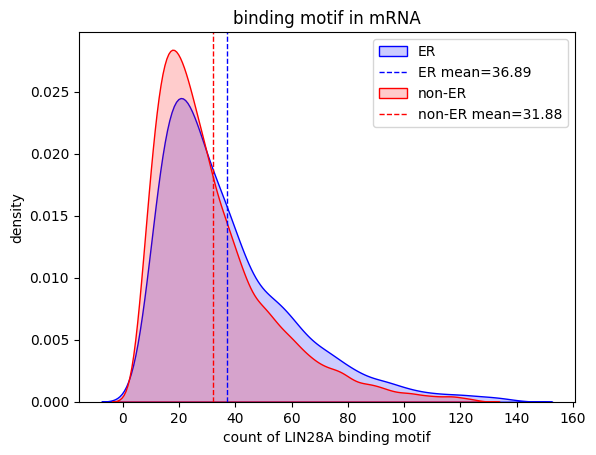

In [37]:
# 극단치를 제거한 후 binding motif의 갯수의 분포를 시각화

sns.kdeplot(ER_motif_cnt_trim, label='ER', color='blue', fill=True, alpha=0.2)
plt.axvline(x=ER_motif_mean_trim, label=f'ER mean={ER_motif_mean_trim}', color='blue', linestyle='--', linewidth=1)

sns.kdeplot(non_ER_motif_cnt_trim, label='non-ER', color='red', fill=True, alpha=0.2)
plt.axvline(x=non_ER_motif_mean_trim, label=f'non-ER mean={non_ER_motif_mean_trim}', color='red', linestyle='--', linewidth=1)

plt.title('binding motif in mRNA')
plt.xlabel('count of LIN28A binding motif')
plt.ylabel('density')
plt.legend()

plt.show()

# 강의에서 다룬 논문에서의 'LIN28A-recognition element itself may not be sufficient to explain the preference for ER-associated mRNAs.'와도 일치하는 결과로 보임.

4. RNA sequence에서 LIN28A의 binding motif를 stem 구조까지 고려하여 counting

In [38]:
def reverse_complement(seq) :

    reverse_seq = seq[::-1]

    complement_dict = {'A':'T', 'T':'A', 'C':'G', 'G':'C'}

    reverse_complement_seq = ''

    for s in reverse_seq :
        reverse_complement_seq += complement_dict[s]

    return reverse_complement_seq

In [39]:
def get_tetra_mer(seq) :

    tetra_mer_list = []

    for i in range( len(seq)-3 ) :
        tetra_mer_list.append( seq[i:i+4] )

    return tetra_mer_list

In [40]:
# sequence에서 LIN28A의 zinc-finger domain의 binding motif인 UGUG, AAGNG, AAGNNG가 존재하며
# 양쪽 서열로 4nt 이상인 stem 구조가 형성된 경우를 counting하는 함수
# window로 binding motif로부터 몇 nt 범위까지 stem 구조를 살펴볼지 설정

def count_motif_with_stem_both(seq, window) :

    seq = '!'*window + seq + '!'*window #양옆으로 의미 없는 서열을 padding

    cnt = 0

    i = window

    while i <= len(seq)-window :

        # UGUG motif with stem
        motif = seq[i:i+4]
        if motif == 'TGTG' :
            left = seq[i-window//2:i]
            right = seq[i+4:i+4+window//2]
            reverse_complement_seq = reverse_complement( right.strip('!') )
            tetra_mer_list = get_tetra_mer(reverse_complement_seq)
            for tetra_mer in tetra_mer_list :
                if tetra_mer in left :
                    cnt += 1
                    i += 4
                    break

        # AAGNG motif with stem
        motif = seq[i:i+5]
        if (motif[:3] == 'AAG') and (motif[4] == 'G') :
            left = seq[i-window//2:i]
            right = seq[i+5:i+5+window//2]
            reverse_complement_seq = reverse_complement( right.strip('!') )
            tetra_mer_list = get_tetra_mer(reverse_complement_seq)
            for tetra_mer in tetra_mer_list :
                if tetra_mer in left :
                    cnt += 1
                    i += 5
                    break

        # AAGNNG motif with stem
        motif = seq[i:i+6]
        if (motif[:3] == 'AAG') and (motif[5] == 'G') :
            left = seq[i-window//2:i]
            right = seq[i+6:i+6+window//2]
            reverse_complement_seq = reverse_complement( right.strip('!') )
            tetra_mer_list = get_tetra_mer(reverse_complement_seq)
            for tetra_mer in tetra_mer_list :
                if tetra_mer in left :
                    cnt += 1
                    i += 6
                    break

        i += 1

    return cnt

In [41]:
# sequence에서 LIN28A의 zinc-finger domain의 binding motif인 UGUG, AAGNG, AAGNNG가 존재하며
# 5' 방향 서열로 4nt 이상인 stem 구조가 형성된 경우를 counting하는 함수
# window로 binding motif로부터 몇 nt 범위까지 stem 구조를 살펴볼지 설정

def count_motif_with_stem_left(seq, window) :

    seq = '!'*window + seq + '!'*window #양옆으로 의미 없는 서열을 padding

    cnt = 0

    i = window

    while i <= len(seq)-window :

        # UGUG motif with stem
        motif = seq[i:i+4]
        if motif == 'TGTG' :
            left = seq[i-window:i-window//2]
            right = seq[i-window//2:i]
            reverse_complement_seq = reverse_complement( right.strip('!') )
            tetra_mer_list = get_tetra_mer(reverse_complement_seq)
            for tetra_mer in tetra_mer_list :
                if tetra_mer in left :
                    cnt += 1
                    i += 4
                    break

        # AAGNG motif with stem
        motif = seq[i:i+5]
        if (motif[:3] == 'AAG') and (motif[4] == 'G') :
            left = seq[i-window:i-window//2]
            right = seq[i-window//2:i]
            reverse_complement_seq = reverse_complement( right.strip('!') )
            tetra_mer_list = get_tetra_mer(reverse_complement_seq)
            for tetra_mer in tetra_mer_list :
                if tetra_mer in left :
                    cnt += 1
                    i += 5
                    break

        # AAGNNG motif with stem
        motif = seq[i:i+6]
        if (motif[:3] == 'AAG') and (motif[5] == 'G') :
            left = seq[i-window:i-window//2]
            right = seq[i-window//2:i]
            reverse_complement_seq = reverse_complement( right.strip('!') )
            tetra_mer_list = get_tetra_mer(reverse_complement_seq)
            for tetra_mer in tetra_mer_list :
                if tetra_mer in left :
                    cnt += 1
                    i += 6
                    break

        i += 1

    return cnt

In [42]:
# sequence에서 LIN28A의 zinc-finger domain의 binding motif인 UGUG, AAGNG, AAGNNG가 존재하며
# 3' 방향 서열로 4nt 이상인 stem 구조가 형성된 경우를 counting하는 함수
# window로 binding motif로부터 몇 nt 범위까지 stem 구조를 살펴볼지 설정

def count_motif_with_stem_right(seq, window) :

    seq = '!'*window + seq + '!'*window #양옆으로 의미 없는 서열을 padding

    cnt = 0

    i = window

    while i <= len(seq)-window-6 :

        # UGUG motif with stem
        motif = seq[i:i+4]
        if motif == 'TGTG' :
            left = seq[i+4:i+4+window//2]
            right = seq[i+4+window//2:i+4+window]
            reverse_complement_seq = reverse_complement( right.strip('!') )
            tetra_mer_list = get_tetra_mer(reverse_complement_seq)
            for tetra_mer in tetra_mer_list :
                if tetra_mer in left :
                    cnt += 1
                    i += 4
                    break

        # AAGNG motif with stem
        motif = seq[i:i+5]
        if (motif[:3] == 'AAG') and (motif[4] == 'G') :
            left = seq[i+5:i+5+window//2]
            right = seq[i+5+window//2:i+5+window]
            reverse_complement_seq = reverse_complement( right.strip('!') )
            tetra_mer_list = get_tetra_mer(reverse_complement_seq)
            for tetra_mer in tetra_mer_list :
                if tetra_mer in left :
                    cnt += 1
                    i += 5
                    break

        # AAGNNG motif with stem
        motif = seq[i:i+6]
        if (motif[:3] == 'AAG') and (motif[5] == 'G') :
            left = seq[i+6:i+6+window//2]
            right = seq[i+6+window//2:i+6+window]
            reverse_complement_seq = reverse_complement( right.strip('!') )
            tetra_mer_list = get_tetra_mer(reverse_complement_seq)
            for tetra_mer in tetra_mer_list :
                if tetra_mer in left :
                    cnt += 1
                    i += 6
                    break

        i += 1

    return cnt

In [43]:
# toy example에서는 window를 10~20까지 조절하면 근처에 stem 구조를 갖는 binding motif를 찾을 수 있었음

def count_motif_with_stem(seq, window) :
    return count_motif_with_stem_both(seq, window)+count_motif_with_stem_left(seq, window)+count_motif_with_stem_right(seq, window)

In [44]:
mRNA_ENSG_count_motif_with_stem = {ENSG:0 for ENSG in mRNA_ENSG} # 각 ENSG의 isoform마다 존재하는 LIN28A의 stem 구조 근처의 binding motif의 평균 갯수를 담은 dictionary

In [45]:
# window=10인 경우를 우선 살펴봄

window = 10

for ENSG in mRNA_ENSG_count_motif_with_stem :
    isoform = mRNA_ENSG_seq[ENSG]
    isoform_cnt = 0
    for seq in isoform :
        isoform_cnt += count_motif_with_stem(seq, window)
    mRNA_ENSG_count_motif_with_stem[ENSG] = isoform_cnt/len(isoform)

In [47]:
mean_row = pd.DataFrame( [ {'mRNA ENSG':'mean', 'motif with stem':round( np.mean( list( mRNA_ENSG_count_motif_with_stem.values() ) ), 2 )} ] )

pd.concat( [pd.DataFrame( mRNA_ENSG_count_motif_with_stem.items(), columns=['mRNA ENSG', 'motif with stem']), mean_row] )

,mRNA ENSG,motif with stem
0,ENSG00000006747,2.142857
1,ENSG00000131037,2.166667
2,ENSG00000158042,0.000000
3,ENSG00000119927,5.500000
4,ENSG00000027869,2.000000
...,...,...
18817,ENSG00000149654,1.000000
18818,ENSG00000173418,0.000000
18819,ENSG00000188352,2.833333
18820,ENSG00000164850,0.000000


In [48]:
# 각 ENSG의 stem 구조 근처의 binding motif 갯수의 평균

print( round( np.mean( list( mRNA_ENSG_count_motif_with_stem.values() ) ), 2 ) )

# stem 구조를 고려하지 않았을 때보다 훨씬 적은 갯수가 관찰됨

2.15


In [49]:
mRNA_ENSG_count_motif_with_stem_window10 = mRNA_ENSG_count_motif_with_stem

In [ ]:
ER_motif_with_stem_cnt = [] # ER-associated ENSG의 stem 구조 근처의 binding motif 갯수
non_ER_motif_with_stem_cnt = [] # non-ER-associated ENSG의 stem 구조 근처의 binding motif 갯수

for ENSG in mRNA_ENSG_count_motif_with_stem :
    if mRNA_ENSG_ER[ENSG] == 1 :
        ER_motif_with_stem_cnt.append( mRNA_ENSG_count_motif_with_stem[ENSG] )
    else :
        non_ER_motif_with_stem_cnt.append( mRNA_ENSG_count_motif_with_stem[ENSG] )

In [ ]:
ER_motif_with_stem_mean = round(np.mean(ER_motif_with_stem_cnt),2)
non_ER_motif_with_stem_mean = round(np.mean(non_ER_motif_with_stem_cnt),2)

print( ER_motif_with_stem_mean, non_ER_motif_with_stem_mean )

# ER-associated ENSG와 non-ER-associated ENSG에서 stem 구조 근처의 binding motif의 평균 갯수는 각각 약 2.44, 2.11로 큰 차이가 나지 않았다.

2.44 2.11


In [ ]:
# 상위 1%, 하위 1%의 극단치 제거
ER_motif_with_stem_cnt_trim = trim1percent(ER_motif_with_stem_cnt)
non_ER_motif_with_stem_cnt_trim = trim1percent(non_ER_motif_with_stem_cnt)

In [ ]:
ER_motif_with_stem_mean_trim = round(np.mean(ER_motif_with_stem_cnt_trim),2)
non_ER_motif_with_stem_mean_trim = round(np.mean(non_ER_motif_with_stem_cnt_trim),2)

print( ER_motif_with_stem_mean_trim, non_ER_motif_with_stem_mean_trim )

# 극단치를 제거한 후에도 stem 구조 근처의 binding motif의 평균 갯수는 각각 약 2.36, 2.02으로 큰 차이가 나지 않았다.

2.36 2.02


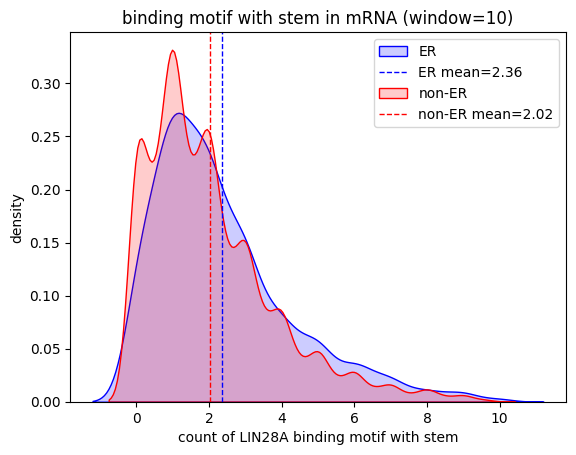

In [ ]:
# 극단치를 제거한 후 stem 구조 근처의 binding motif의 갯수의 분포를 시각화

sns.kdeplot(ER_motif_with_stem_cnt_trim, label='ER', color='blue', fill=True, alpha=0.2)
plt.axvline(x=ER_motif_with_stem_mean_trim, label=f'ER mean={ER_motif_with_stem_mean_trim}', color='blue', linestyle='--', linewidth=1)

sns.kdeplot(non_ER_motif_with_stem_cnt_trim, label='non-ER', color='red', fill=True, alpha=0.2)
plt.axvline(x=non_ER_motif_with_stem_mean_trim, label=f'non-ER mean={non_ER_motif_with_stem_mean_trim}', color='red', linestyle='--', linewidth=1)

plt.title(f'binding motif with stem in mRNA (window={window})')
plt.xlabel('count of LIN28A binding motif with stem')
plt.ylabel('density')
plt.legend()

plt.show()

# window=10인 경우에 stem 구조 근처의 binding motif의 평균 갯수는 ER-associated mRNA와 non-ER-associated mRNA에서 비슷한 분포를 보였다.

In [53]:
# window를 설정하여 stem 구조 근처의 binding motif 갯수의 kdeplot을 그리는 함수

def draw_kdeplot_mRNA(window) :

    mRNA_ENSG_count_motif_with_stem = {ENSG:0 for ENSG in mRNA_ENSG}

    for ENSG in mRNA_ENSG_count_motif_with_stem :
        isoform = mRNA_ENSG_seq[ENSG]
        isoform_cnt = 0
        for seq in isoform :
            isoform_cnt += count_motif_with_stem(seq, window)
        mRNA_ENSG_count_motif_with_stem[ENSG] = isoform_cnt/len(isoform)

    ER_motif_with_stem_cnt = []
    non_ER_motif_with_stem_cnt = []

    for ENSG in mRNA_ENSG_count_motif_with_stem :
        if mRNA_ENSG_ER[ENSG] == 1 :
            ER_motif_with_stem_cnt.append( mRNA_ENSG_count_motif_with_stem[ENSG] )
        else :
            non_ER_motif_with_stem_cnt.append( mRNA_ENSG_count_motif_with_stem[ENSG] )

    ER_motif_with_stem_cnt_trim = trim1percent(ER_motif_with_stem_cnt)
    non_ER_motif_with_stem_cnt_trim = trim1percent(non_ER_motif_with_stem_cnt)

    ER_motif_with_stem_mean_trim = round(np.mean(ER_motif_with_stem_cnt_trim),2)
    non_ER_motif_with_stem_mean_trim = round(np.mean(non_ER_motif_with_stem_cnt_trim),2)

    sns.kdeplot(ER_motif_with_stem_cnt_trim, label='ER', color='blue', fill=True, alpha=0.2)
    plt.axvline(x=ER_motif_with_stem_mean_trim, label=f'ER mean={ER_motif_with_stem_mean_trim}', color='blue', linestyle='--', linewidth=1)

    sns.kdeplot(non_ER_motif_with_stem_cnt_trim, label='non-ER', color='red', fill=True, alpha=0.2)
    plt.axvline(x=non_ER_motif_with_stem_mean_trim, label=f'non-ER mean={non_ER_motif_with_stem_mean_trim}', color='red', linestyle='--', linewidth=1)

    plt.title(f'binding motif with stem in mRNA (window={window})')
    plt.xlabel('count of LIN28A binding motif with stem')
    plt.ylabel('density')
    plt.legend()

    plt.show()

    return mRNA_ENSG_count_motif_with_stem

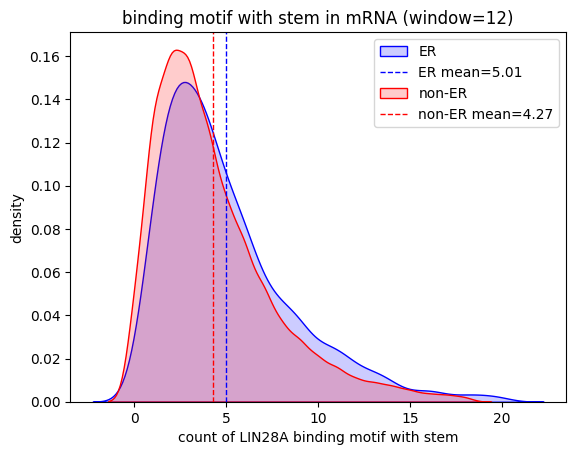

In [54]:
mRNA_ENSG_count_motif_with_stem_window12 = draw_kdeplot_mRNA(window=12)

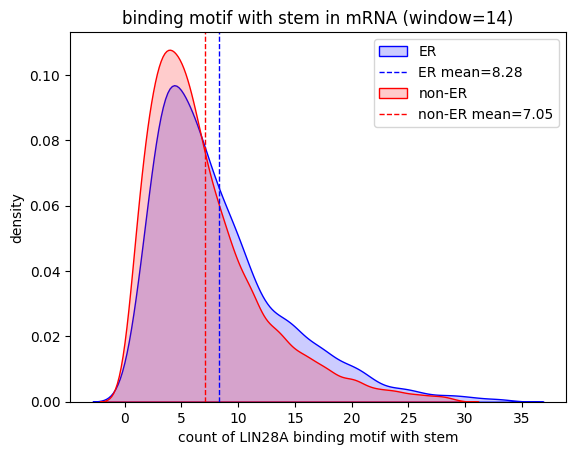

In [55]:
mRNA_ENSG_count_motif_with_stem_window14 = draw_kdeplot_mRNA(window=14)

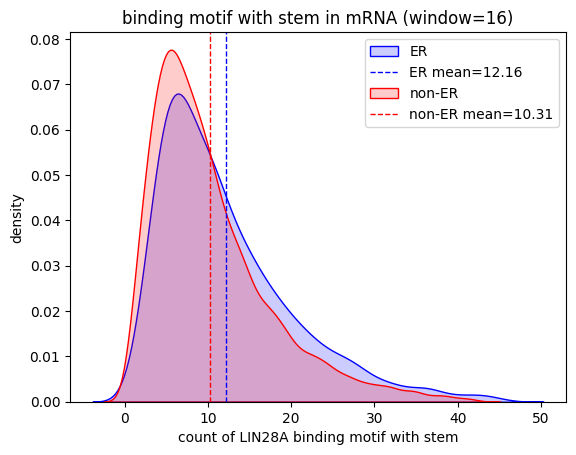

In [56]:
mRNA_ENSG_count_motif_with_stem_window16 = draw_kdeplot_mRNA(window=16)

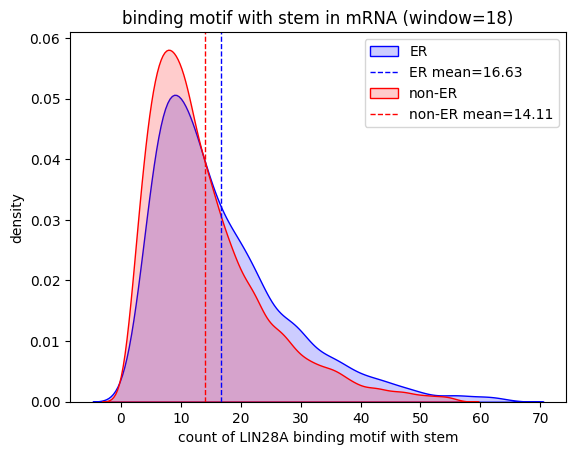

In [57]:
mRNA_ENSG_count_motif_with_stem_window18 = draw_kdeplot_mRNA(window=18)

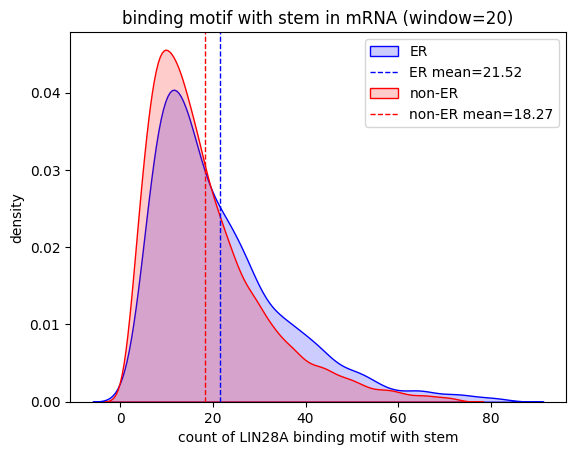

In [58]:
mRNA_ENSG_count_motif_with_stem_window20 = draw_kdeplot_mRNA(window=20)

In [ ]:
# stem 구조를 고려했을 때에도 ER-associated mRNA와 non-ER-associated mRNA 간에 binding motif 갯수 분포에는 큰 차이가 없었다.

5. RNA 발현량을 반영하기 위해 motif count에 FPKM을 곱하여 비교

In [48]:
mRNA_ENSG_FPKM = dict.fromkeys(mRNA_ENSG, 0) # mRNA의 ENSG와 FPKM(Avg FPKM of pre-SA)을 매칭한 dictionary

for ENSG in mRNA_ENSG_FPKM :
    mRNA_ENSG_FPKM[ENSG] = APEX_mRNA[APEX_mRNA['Ensemble Gene ID'].str.startswith(ENSG)]['Avg FPKM of pre-SA'].item()

In [51]:
pd.DataFrame( mRNA_ENSG_FPKM.items(), columns=['mRNA ENSG', 'FPKM'] )

,mRNA ENSG,FPKM
0,ENSG00000006747,0.286140
1,ENSG00000131037,2.697660
2,ENSG00000158042,34.172000
3,ENSG00000119927,9.266760
4,ENSG00000027869,1.810230
...,...,...
18816,ENSG00000166825,0.245709
18817,ENSG00000149654,0.029393
18818,ENSG00000173418,30.581600
18819,ENSG00000188352,31.776600


In [52]:
mRNA_ENSG_motif_FPKM = dict.fromkeys(mRNA_ENSG, 0) # mRNA의 ENSG와 motif count*FPKM을 매칭한 dictionary

for ENSG in mRNA_ENSG_motif_FPKM :
    mRNA_ENSG_motif_FPKM[ENSG] = mRNA_ENSG_count_motif[ENSG]*mRNA_ENSG_FPKM[ENSG]

In [54]:
pd.DataFrame( mRNA_ENSG_motif_FPKM.items(), columns=['mRNA ENSG', 'motif*FPKM'] )

,mRNA ENSG,motif*FPKM
0,ENSG00000006747,8.584200
1,ENSG00000131037,65.643060
2,ENSG00000158042,563.838000
3,ENSG00000119927,745.974180
4,ENSG00000027869,27.756860
...,...,...
18816,ENSG00000166825,7.821737
18817,ENSG00000149654,1.087552
18818,ENSG00000173418,305.816000
18819,ENSG00000188352,1133.365400


In [55]:
ER_motif_FPKM = [] # ER-associated ENSG의 binding motif count*FPKM
non_ER_motif_FPKM = [] # non-ER-associated ENSG의 binding motif count*FPKM

for ENSG in mRNA_ENSG_motif_FPKM :
    if mRNA_ENSG_ER[ENSG] == 1 :
        ER_motif_FPKM.append( mRNA_ENSG_motif_FPKM[ENSG] )
    else :
        non_ER_motif_FPKM.append( mRNA_ENSG_motif_FPKM[ENSG] )

In [56]:
ER_motif_FPKM_mean = round(np.mean(ER_motif_FPKM),2)
non_ER_motif_FPKM_mean = round(np.mean(non_ER_motif_FPKM),2)

print( ER_motif_FPKM_mean, non_ER_motif_FPKM_mean )

# ER-associated ENSG와 non-ER-associated ENSG에서 binding motif count*FPKM의 평균은 각각 약 503.3, 525.68로 큰 차이가 나지 않았다.

503.3 525.68


In [57]:
# 상위 1%, 하위 1%의 극단치 제거

ER_motif_FPKM_trim = trim1percent(ER_motif_FPKM)
non_ER_motif_FPKM_trim = trim1percent(non_ER_motif_FPKM)

In [58]:
ER_motif_FPKM_trim_mean = round(np.mean(ER_motif_FPKM_trim),2)
non_ER_motif_FPKM_trim_mean = round(np.mean(non_ER_motif_FPKM_trim),2)

print( ER_motif_FPKM_trim_mean, non_ER_motif_FPKM_trim_mean )

# 극단치를 제거한 후에도 binding motif count*FPKM의 평균은 각각 약 446.04, 416.55로 큰 차이가 나지 않았다.

446.04 416.55


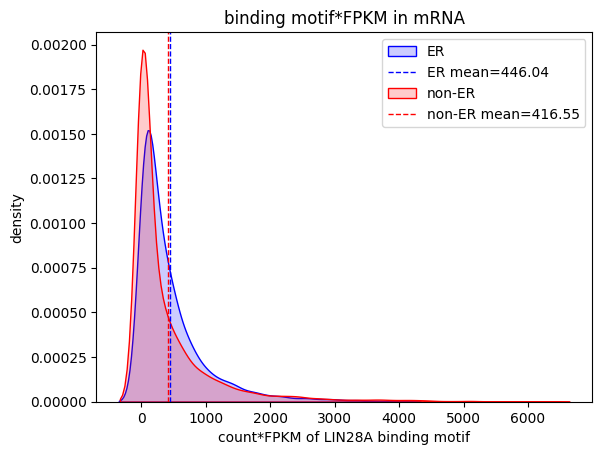

In [59]:
# 극단치를 제거한 후 binding motif count*FPKM의 분포를 시각화

sns.kdeplot(ER_motif_FPKM_trim, label='ER', color='blue', fill=True, alpha=0.2)
plt.axvline(x=ER_motif_FPKM_trim_mean, label=f'ER mean={ER_motif_FPKM_trim_mean}', color='blue', linestyle='--', linewidth=1)

sns.kdeplot(non_ER_motif_FPKM_trim, label='non-ER', color='red', fill=True, alpha=0.2)
plt.axvline(x=non_ER_motif_FPKM_trim_mean, label=f'non-ER mean={non_ER_motif_FPKM_trim_mean}', color='red', linestyle='--', linewidth=1)

plt.title('binding motif*FPKM in mRNA')
plt.xlabel('count*FPKM of LIN28A binding motif')
plt.ylabel('density')
plt.legend()

plt.show()

In [60]:
mRNA_ENSG_motif_with_stem_FPKM = dict.fromkeys(mRNA_ENSG, 0) # mRNA의 ENSG와 motif with stem count*FPKM을 매칭한 dictionary, window=10인 경우

for ENSG in mRNA_ENSG_motif_with_stem_FPKM :
    mRNA_ENSG_motif_with_stem_FPKM[ENSG] = mRNA_ENSG_count_motif_with_stem[ENSG]*mRNA_ENSG_FPKM[ENSG]

In [62]:
pd.DataFrame( mRNA_ENSG_motif_with_stem_FPKM.items(), columns=['mRNA ENSG', 'motif with stem*FPKM'] )

,mRNA ENSG,motif with stem*FPKM
0,ENSG00000006747,0.613157
1,ENSG00000131037,5.844930
2,ENSG00000158042,0.000000
3,ENSG00000119927,50.967180
4,ENSG00000027869,3.620460
...,...,...
18816,ENSG00000166825,0.327612
18817,ENSG00000149654,0.029393
18818,ENSG00000173418,0.000000
18819,ENSG00000188352,90.033700


In [77]:
ER_motif_with_stem_FPKM = [] # ER-associated ENSG의 stem 구조 근처의 motif with stem count*FPKM
non_ER_motif_with_stem_FPKM = [] # non-ER-associated ENSG의 stem 구조 근처의 motif with stem count*FPKM

for ENSG in mRNA_ENSG_motif_with_stem_FPKM :
    if mRNA_ENSG_ER[ENSG] == 1 :
        ER_motif_with_stem_FPKM.append( mRNA_ENSG_motif_with_stem_FPKM[ENSG] )
    else :
        non_ER_motif_with_stem_FPKM.append( mRNA_ENSG_motif_with_stem_FPKM[ENSG] )

In [78]:
ER_motif_with_stem_FPKM_mean = round(np.mean(ER_motif_with_stem_FPKM),2)
non_ER_motif_with_stem_FPKM_mean = round(np.mean(non_ER_motif_with_stem_FPKM),2)

print( ER_motif_with_stem_FPKM_mean, non_ER_motif_with_stem_FPKM_mean )

# ER-associated ENSG와 non-ER-associated ENSG에서 stem 구조 근처의 motif with stem count*FPKM의 평균은 각각 약 31.63 31.58로 큰 차이가 나지 않았다.

31.63 31.58


In [79]:
# 상위 1%, 하위 1%의 극단치 제거

ER_motif_with_stem_FPKM_trim = trim1percent(ER_motif_with_stem_FPKM)
non_ER_motif_with_stem_FPKM_trim = trim1percent(non_ER_motif_with_stem_FPKM)

In [80]:
ER_motif_with_stem_FPKM_trim_mean = round(np.mean(ER_motif_with_stem_FPKM_trim),2)
non_ER_motif_with_stem_FPKM_trim_mean = round(np.mean(non_ER_motif_with_stem_FPKM_trim),2)

print( ER_motif_with_stem_FPKM_trim_mean, non_ER_motif_with_stem_FPKM_trim_mean )

# 극단치를 제거한 후에도 stem 구조 근처의 motif with stem count*FPKM의 평균은 각각 약 28.04, 24.6으로 큰 차이가 나지 않았다.

28.04 24.6


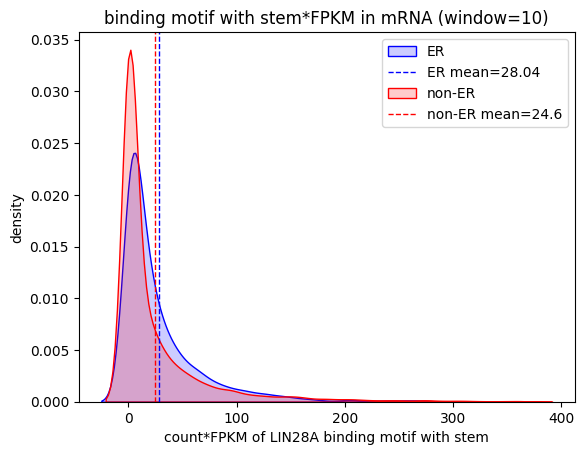

In [82]:
# 극단치를 제거한 후 stem 구조 근처의 binding motif의 갯수의 분포를 시각화

sns.kdeplot(ER_motif_with_stem_FPKM_trim, label='ER', color='blue', fill=True, alpha=0.2)
plt.axvline(x=ER_motif_with_stem_FPKM_trim_mean, label=f'ER mean={ER_motif_with_stem_FPKM_trim_mean}', color='blue', linestyle='--', linewidth=1)

sns.kdeplot(non_ER_motif_with_stem_FPKM_trim, label='non-ER', color='red', fill=True, alpha=0.2)
plt.axvline(x=non_ER_motif_with_stem_FPKM_trim_mean, label=f'non-ER mean={non_ER_motif_with_stem_FPKM_trim_mean}', color='red', linestyle='--', linewidth=1)

plt.title(f'binding motif with stem*FPKM in mRNA (window={window})')
plt.xlabel('count*FPKM of LIN28A binding motif with stem')
plt.ylabel('density')
plt.legend()

plt.show()

# window=10인 경우에 stem 구조 근처의 motif with stem count*FPKM의 평균은 ER-associated mRNA와 non-ER-associated mRNA에서 비슷한 분포를 보였다.

In [85]:
# binding motif with stem갯수*FPKM의 kdeplot을 그리는 함수

def draw_kdeplot_mRNA_FPKM(mRNA_ENSG_count_motif_with_stem, window) :

    mRNA_ENSG_motif_with_stem_FPKM = dict.fromkeys(mRNA_ENSG, 0)

    for ENSG in mRNA_ENSG_motif_with_stem_FPKM :
        mRNA_ENSG_motif_with_stem_FPKM[ENSG] = mRNA_ENSG_count_motif_with_stem[ENSG]*mRNA_ENSG_FPKM[ENSG]

    ER_motif_with_stem_FPKM = []
    non_ER_motif_with_stem_FPKM = []

    for ENSG in mRNA_ENSG_motif_with_stem_FPKM :
        if mRNA_ENSG_ER[ENSG] == 1 :
            ER_motif_with_stem_FPKM.append( mRNA_ENSG_motif_with_stem_FPKM[ENSG] )
        else :
            non_ER_motif_with_stem_FPKM.append( mRNA_ENSG_motif_with_stem_FPKM[ENSG] )

    ER_motif_with_stem_FPKM_trim = trim1percent(ER_motif_with_stem_FPKM)
    non_ER_motif_with_stem_FPKM_trim = trim1percent(non_ER_motif_with_stem_FPKM)

    ER_motif_with_stem_FPKM_trim_mean = round(np.mean(ER_motif_with_stem_FPKM_trim),2)
    non_ER_motif_with_stem_FPKM_trim_mean = round(np.mean(non_ER_motif_with_stem_FPKM_trim),2)

    sns.kdeplot(ER_motif_with_stem_FPKM_trim, label='ER', color='blue', fill=True, alpha=0.2)
    plt.axvline(x=ER_motif_with_stem_FPKM_trim_mean, label=f'ER mean={ER_motif_with_stem_FPKM_trim_mean}', color='blue', linestyle='--', linewidth=1)

    sns.kdeplot(non_ER_motif_with_stem_FPKM_trim, label='non-ER', color='red', fill=True, alpha=0.2)
    plt.axvline(x=non_ER_motif_with_stem_FPKM_trim_mean, label=f'non-ER mean={non_ER_motif_with_stem_FPKM_trim_mean}', color='red', linestyle='--', linewidth=1)

    plt.title(f'binding motif with stem*FPKM in mRNA (window={window})')
    plt.xlabel('count*FPKM of LIN28A binding motif with stem')
    plt.ylabel('density')
    plt.legend()

    plt.show()

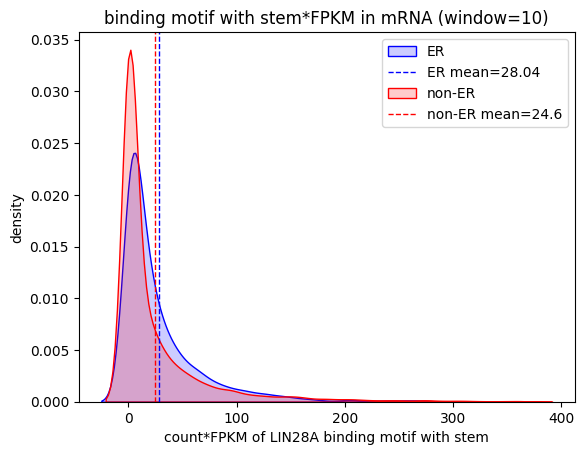

In [86]:
draw_kdeplot_mRNA_FPKM(mRNA_ENSG_count_motif_with_stem_window10, window=10)

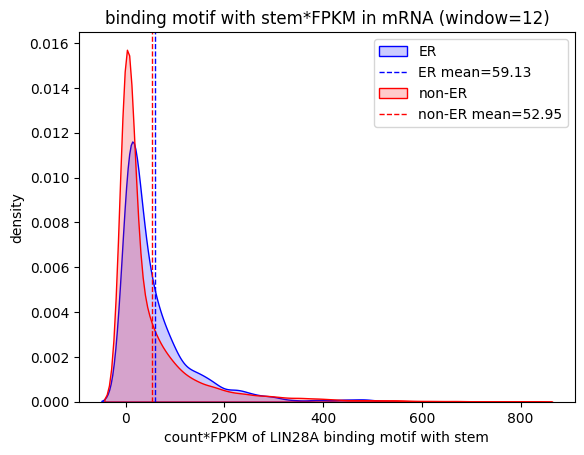

In [88]:
draw_kdeplot_mRNA_FPKM(mRNA_ENSG_count_motif_with_stem_window12, window=12)

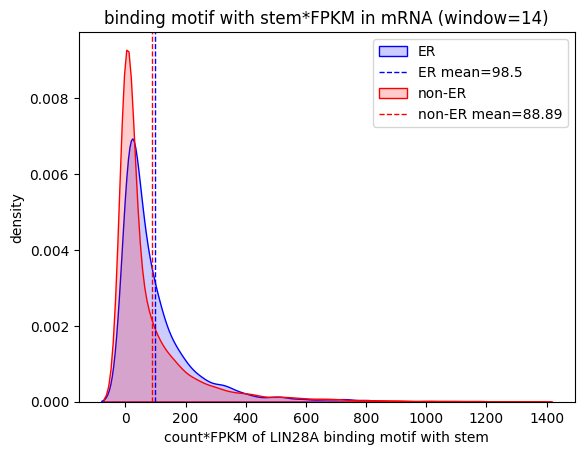

In [89]:
draw_kdeplot_mRNA_FPKM(mRNA_ENSG_count_motif_with_stem_window14, window=14)

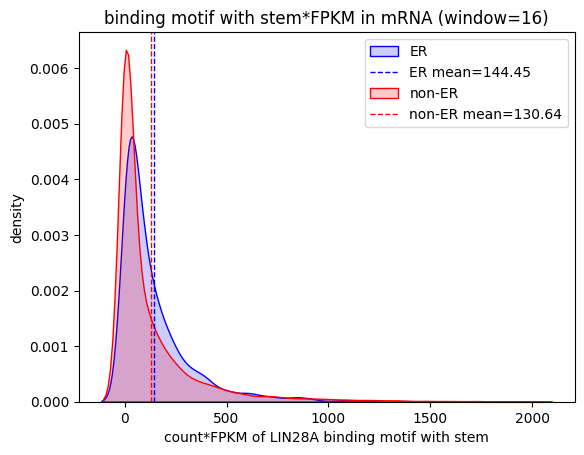

In [90]:
draw_kdeplot_mRNA_FPKM(mRNA_ENSG_count_motif_with_stem_window16, window=16)

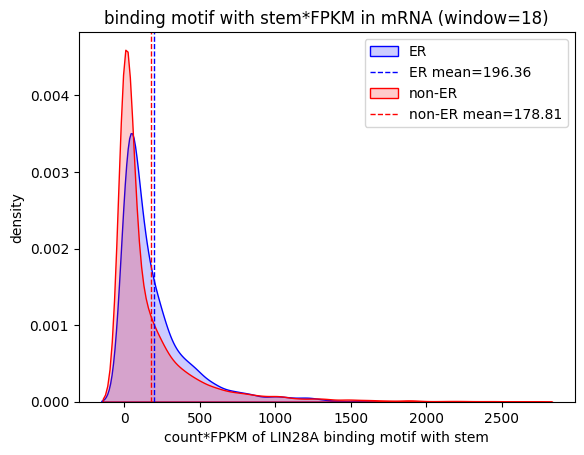

In [91]:
draw_kdeplot_mRNA_FPKM(mRNA_ENSG_count_motif_with_stem_window18, window=18)

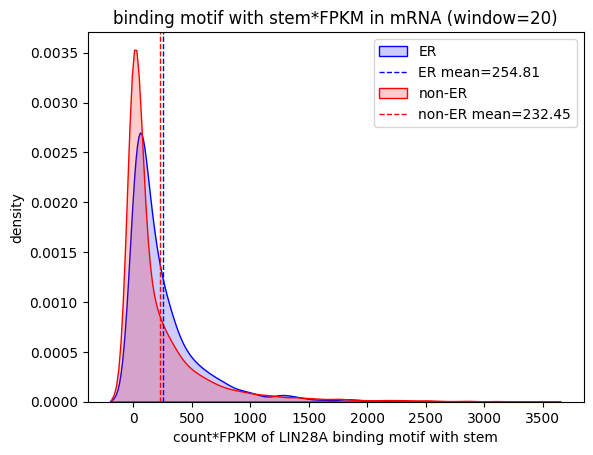

In [92]:
draw_kdeplot_mRNA_FPKM(mRNA_ENSG_count_motif_with_stem_window20, window=20)

6. lncRNA에 대하여 같은 분석을 시행

In [ ]:
ER_associated_lncRNA = ER_associated_RNA[ ER_associated_RNA['Gene type'] == 'lincRNA' ].reset_index(drop=True) # ER-associated lncRNA

In [ ]:
gene_name_cnt = Counter( ER_associated_lncRNA['Gene name'] )

duplicate_gene = []

for gene_name in  gene_name_cnt :
    if gene_name_cnt[gene_name] > 1 :
        duplicate_gene.append(gene_name)

print(duplicate_gene)

# Gene name이 2번 이상 존재하는 경우가 없음
# ENSG가 중복되는 경우는 없었음

[]


In [ ]:
ER_associated_lncRNA_ENSG = ER_associated_lncRNA['Ensemble Gene ID'] # ER-associated lncRNA의 Ensembl Gene ID (ENSG) , ENST에 대한 정보가 없어서 isoform은 무시함
ER_associated_lncRNA_ENSG = set( ENSG.split('.')[0] for ENSG in ER_associated_lncRNA_ENSG ) # comma 뒤의 ENSG version은 무시

In [ ]:
APEX_RNA = pd.read_excel(apex_rip, sheet_name='B-Unfildered KDEL-RIP Seq Data') #APEX-RIP 실험에서 검출된 모든 RNA
APEX_lncRNA = APEX_RNA[ APEX_RNA['Gene type'] == 'lincRNA' ].reset_index(drop=True) #APEX-RIP 실험에서 검출된 모든 lncRNA

In [ ]:
gene_name_cnt = Counter( APEX_lncRNA['Gene name'] )

duplicate_gene = []

for gene_name in  gene_name_cnt :
    if gene_name_cnt[gene_name] > 1 :
        duplicate_gene.append(gene_name)

print(duplicate_gene)

# Gene name이 2번 이상 존재하는 경우를 발견
# ENSG가 중복되는 경우는 없었음

['7SK', 'LINC00102', 'LINC00106', 'RP11-309M23.1', 'RP13-297E16.4', 'RP13-297E16.5', 'SNORA40', 'U1']


In [ ]:
# Gene name이 중복되는 경우 ENSG의 comma 뒤의 version이 가장 높은 경우 하나만 남김

del_index_list = []

for gene_name in duplicate_gene :

    gene_df = APEX_lncRNA[ APEX_lncRNA['Gene name'] == gene_name ]

    ENSG_list = gene_df['Ensemble Gene ID']

    version_max = max( int(ENSG.split('.')[1]) for ENSG in ENSG_list )

    del_index = list(gene_df.index)

    for i in gene_df.index :
        if int(gene_df.loc[i]['Ensemble Gene ID'].split('.')[1]) == version_max :
            del_index.remove(i)
            break

    del_index_list.extend(del_index)

In [ ]:
APEX_lncRNA = APEX_lncRNA.drop(del_index_list).reset_index(drop=True)

In [ ]:
gene_name_cnt = Counter( APEX_lncRNA['Gene name'] )

duplicate_gene = []

for gene_name in  gene_name_cnt :
    if gene_name_cnt[gene_name] > 1 :
        duplicate_gene.append(gene_name)

print(duplicate_gene)

# Gene name의 중복이 사라짐

[]


In [ ]:
APEX_lncRNA_ENSG = APEX_lncRNA['Ensemble Gene ID'] # APEX-RIP으로부터 얻은 human lncRNA의 Ensembl Gene ID (ENSG), ENST에 대한 정보가 없어서 isoform은 무시함
APEX_lncRNA_ENSG = set( ENSG.split('.')[0] for ENSG in APEX_lncRNA_ENSG ) # comma 뒤의 ENSG version은 무시

In [ ]:
lncRNA_ENSG_ER = dict.fromkeys(APEX_lncRNA_ENSG, 0) # lncRNA의 ENSG와 ER-associated 여부를 매칭한 dictionary, ER-associated=1, non-ER-associated=0

for ENSG in lncRNA_ENSG_ER :
    if ENSG in ER_associated_lncRNA_ENSG :
        lncRNA_ENSG_ER[ENSG] = 1

In [ ]:
pd.DataFrame( lncRNA_ENSG_ER.items(), columns=['ENSG', 'ER-associated'] )

,ENSG,ER-associated
0,ENSG00000230229,0
1,ENSG00000228971,0
2,ENSG00000261068,0
3,ENSG00000243062,0
4,ENSG00000224095,0
...,...,...
7099,ENSG00000230379,0
7100,ENSG00000272137,0
7101,ENSG00000230131,0
7102,ENSG00000267636,0


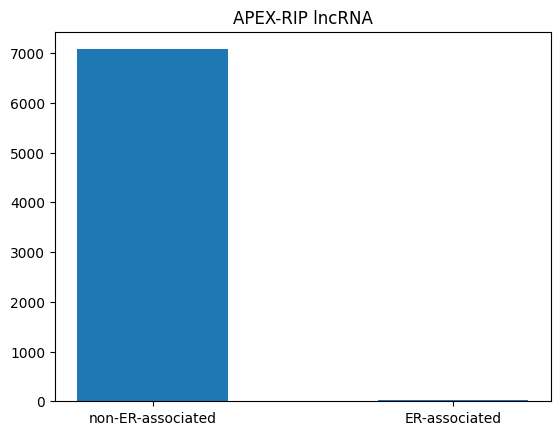

In [ ]:
x = ['non-ER-associated', 'ER-associated']
y = Counter(lncRNA_ENSG_ER.values()).values()

plt.bar(x, y, width=0.5)
plt.title('APEX-RIP lncRNA')
plt.show()

In [ ]:
# human lncRNA sequence가 담긴 fasta file, 데이터 처리의 편의를 위해 마지막 줄에 >END|END.0 삽입

lncRNA_transcripts = '/content/drive/MyDrive/bioinfo/GENCODE/gencode.v48.lncRNA_transcripts.fa'

In [ ]:
GENCODE_lncRNA_ENSG = set() # GENCODE로부터 얻은 human lncRNA의 ENSG

data = open(lncRNA_transcripts)

for line in data :
    if line.startswith('>') :
        ENSG = line.split('|')[1].split('.')[0]
        GENCODE_lncRNA_ENSG.add(ENSG)

GENCODE_lncRNA_ENSG.remove('END')

data.close()

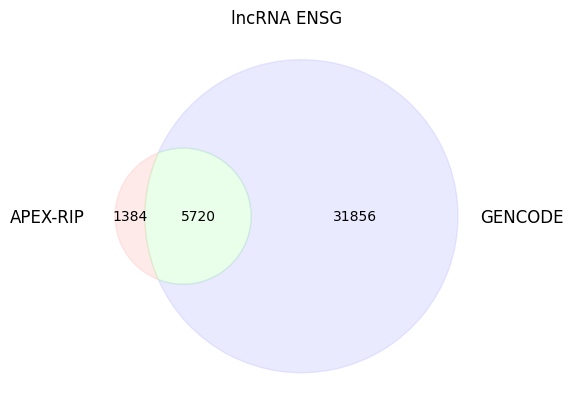

In [ ]:
# APEX-RIP으로부터 얻은 ENSG와 GENCODE로부터 얻은 ENSG 비교

venn = venn2( [APEX_lncRNA_ENSG, GENCODE_lncRNA_ENSG], set_labels=['APEX-RIP', 'GENCODE'] )

venn.set_labels[0].set_position( [-0.7, 0.03] )
venn.set_labels[1].set_position( [0.7, 0.03] )

venn.get_patch_by_id('10').set_color('#ff9999')
venn.get_patch_by_id('01').set_color('#9999ff')
venn.get_patch_by_id('11').set_color('#99ff99')

venn.get_patch_by_id('10').set_alpha(0.2)
venn.get_patch_by_id('01').set_alpha(0.2)
venn.get_patch_by_id('11').set_alpha(0.2)

plt.title('lncRNA ENSG')
plt.show()

# APEX-RIP의 데이터는 하나의 cell line인 HEK293T로부터 얻은 데이터이므로 GENCODE에서의 누락이 많음을 확인할 수 있음
# APEX-RIP에만 있고 GENCODE에 없는 ENSG는 https://asia.ensembl.org/ 에서 검색한 결과 현재는 유효하지 않은 경우가 많았음

In [ ]:
lncRNA_ENSG = APEX_lncRNA_ENSG & GENCODE_lncRNA_ENSG # APEX-RIP과 GENCODE에서 공통적으로 나타나는 ENSG, APEX-RIP에 치우친 데이터

In [ ]:
GENCODE_lncRNA_ENSG_seq = {ENSG:[] for ENSG in GENCODE_lncRNA_ENSG} # GENCODE에서 얻은 lncRNA의 ENSG와 isoform의 sequence를 매칭한 dictionary

data = open(lncRNA_transcripts)

line = data.readline()
ENSG = line.split('|')[1].split('.')[0]
seq = ''

for line in data :
    if line.startswith('>') :
        GENCODE_lncRNA_ENSG_seq[ENSG].append(seq)
        ENSG = line.split('|')[1].split('.')[0]
        seq = ''
    else :
        seq += line.strip('\n').upper()

data.close()

In [ ]:
del_key = []

for ENSG in GENCODE_lncRNA_ENSG_seq :
    if ENSG not in APEX_lncRNA_ENSG :
        del_key.append(ENSG)

for ENSG in del_key :
    del GENCODE_lncRNA_ENSG_seq[ENSG]

lncRNA_ENSG_seq = GENCODE_lncRNA_ENSG_seq # APEX-RIP과 GENCODE에서 공통적으로 나타나는 ENSG와 isoform의 sequence를 매칭한 dictionary

In [ ]:
pd.DataFrame( lncRNA_ENSG_seq.items(), columns=['ENSG', 'isoform sequence'] )

,ENSG,isoform sequence
0,ENSG00000230229,[CTGTGCAGAGGAACCAAAGATGGATACCACATGTGGCTTTGGGGA...
1,ENSG00000258935,[AGAAACTCCCCCCGTCCATCAGAGTGGAGACAAAGTTCTCTAGGG...
2,ENSG00000230844,[CCGGGTCAGCCGAGCATTTCCGCTTCCCACAGCCCCCTGGGAACG...
3,ENSG00000257488,[CCCTGAGAAGGTCTTGGCCTGAAGACACTCACCTCTCTTTCCCCA...
4,ENSG00000251448,[ACACAGAAAGCCCTGAGGACTGAAACCCTGCATGGGTACATTTTG...
...,...,...
5715,ENSG00000232117,[GTAGGTGGCAGAGCTGGGGTTGTTCTGACAACGAGGTGCGGTTCT...
5716,ENSG00000254263,[GGTATATACACTGTTTTTTAGACATAAATCGTATCAATAATCTCA...
5717,ENSG00000229807,[GCTCGGAACTACATGCCCTAGGATATAAAAATGATGTTATCATTA...
5718,ENSG00000234640,[GACCTTTCCTTCCCACGGCGCTGCTCTGTAATTAGATGTAGTTCC...


In [ ]:
lncRNA_ENSG_count_motif = {ENSG:0 for ENSG in lncRNA_ENSG} # 각 ENSG의 isoform마다 존재하는 LIN28A의 binding motif의 평균 갯수를 담은 dictionary

In [ ]:
for ENSG in lncRNA_ENSG_count_motif :
    isoform = lncRNA_ENSG_seq[ENSG]
    isoform_cnt = 0
    for seq in isoform :
        isoform_cnt += count_motif(seq)
    lncRNA_ENSG_count_motif[ENSG] = isoform_cnt/len(isoform)

In [ ]:
pd.DataFrame( lncRNA_ENSG_count_motif.items(), columns=['ENSG', 'motif count'] )

,ENSG,motif count
0,ENSG00000230229,8.000000
1,ENSG00000228971,16.111111
2,ENSG00000243062,9.400000
3,ENSG00000224095,7.000000
4,ENSG00000237588,44.000000
...,...,...
5715,ENSG00000258743,14.511628
5716,ENSG00000273084,16.166667
5717,ENSG00000235824,25.000000
5718,ENSG00000230379,4.333333


In [ ]:
# 각 ENSG의 binding motif 갯수의 평균

print( round( np.mean( list( lncRNA_ENSG_count_motif.values() ) ), 2 ) )

13.49


In [ ]:
ER_motif_cnt = [] # ER-associated ENSG의 binding motif 갯수
non_ER_motif_cnt = [] # non-ER-associated ENSG의 binding motif 갯수

for ENSG in lncRNA_ENSG_count_motif :
    if lncRNA_ENSG_ER[ENSG] == 1 :
        ER_motif_cnt.append( lncRNA_ENSG_count_motif[ENSG] )
    else :
        non_ER_motif_cnt.append( lncRNA_ENSG_count_motif[ENSG] )

In [ ]:
ER_motif_mean = round(np.mean(ER_motif_cnt),2)
non_ER_motif_mean = round(np.mean(non_ER_motif_cnt),2)

print( ER_motif_mean, non_ER_motif_mean )

# ER-associated ENSG와 non-ER-associated ENSG에서 binding motif의 평균 갯수는 각각 약 27.5, 13.62로 lncRNA의 경우는 mRNA에 비해 큰 차이가 나타났다.

26.61 13.46


In [ ]:
# 상위 1%, 하위 1%의 극단치 제거
ER_motif_cnt_trim = trim1percent(ER_motif_cnt)
non_ER_motif_cnt_trim = trim1percent(non_ER_motif_cnt)

In [ ]:
ER_motif_mean_trim = round(np.mean(ER_motif_cnt_trim),2)
non_ER_motif_mean_trim = round(np.mean(non_ER_motif_cnt_trim),2)

print( ER_motif_mean_trim, non_ER_motif_mean_trim )

# 극단치를 제거한 후에도 binding motif의 평균 갯수는 각각 약 21.31, 13.11로 lncRNA의 경우는 mRNA에 비해 큰 차이가 나타났다.

21.12 12.95


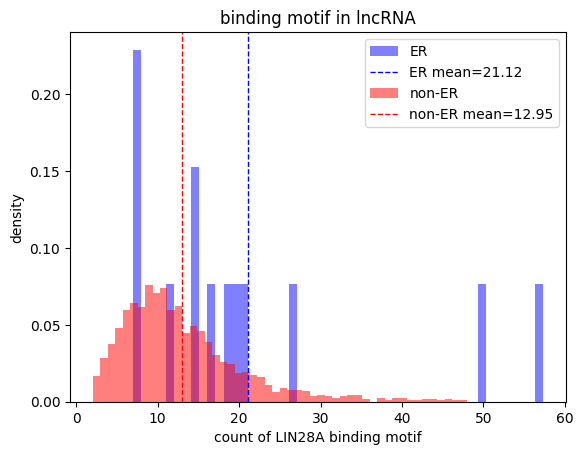

In [ ]:
# 극단치를 제거한 후 binding motif의 갯수의 분포를 시각화
# density=True

plt.hist(ER_motif_cnt_trim, label='ER', color='blue', fill=True, alpha=0.5, density=True, bins=50)
plt.axvline(x=ER_motif_mean_trim, label=f'ER mean={ER_motif_mean_trim}', color='blue', linestyle='--', linewidth=1)

plt.hist(non_ER_motif_cnt_trim, label='non-ER', color='red', fill=True, alpha=0.5, density=True, bins=50)
plt.axvline(x=non_ER_motif_mean_trim, label=f'non-ER mean={non_ER_motif_mean_trim}', color='red', linestyle='--', linewidth=1)

plt.title('binding motif in lncRNA')
plt.xlabel('count of LIN28A binding motif')
plt.ylabel('density')
plt.legend()

plt.show()

# APEX-RIP 데이터로부터 얻은 ER-associated lncRNA의 갯수가 너무 적어서 분포를 비교하는 것은 의미가 없어보임.

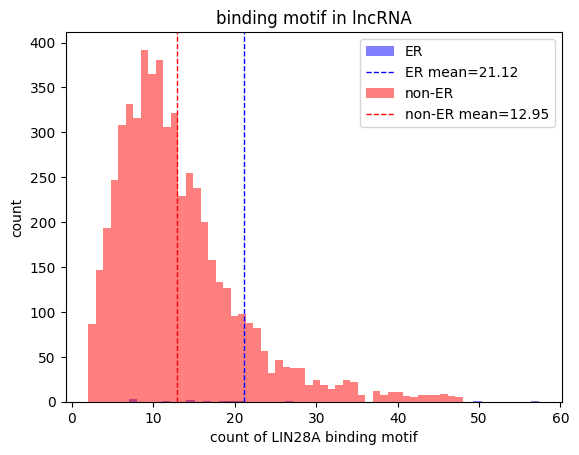

In [ ]:
# 극단치를 제거한 후 binding motif의 갯수의 분포를 시각화
# density=False

plt.hist(ER_motif_cnt_trim, label='ER', color='blue', fill=True, alpha=0.5, bins=50)
plt.axvline(x=ER_motif_mean_trim, label=f'ER mean={ER_motif_mean_trim}', color='blue', linestyle='--', linewidth=1)

plt.hist(non_ER_motif_cnt_trim, label='non-ER', color='red', fill=True, alpha=0.5, bins=50)
plt.axvline(x=non_ER_motif_mean_trim, label=f'non-ER mean={non_ER_motif_mean_trim}', color='red', linestyle='--', linewidth=1)

plt.title('binding motif in lncRNA')
plt.xlabel('count of LIN28A binding motif')
plt.ylabel('count')
plt.legend()

plt.show()

# APEX-RIP 데이터로부터 얻은 ER-associated lncRNA의 갯수가 너무 적어서 분포를 비교하는 것은 의미가 없어보임.